# Error Bars, Error Bands & Confidence Intervals

## Overview
Error visualization communicates uncertainty: measurement noise, sampling variability, and model confidence. This notebook covers classic error bars and modern shaded confidence bands.

### What you'll learn
- `errorbar()` for symmetric/asymmetric error bars
- `fill_between()` for error bands
- Standard error vs standard deviation vs confidence intervals
- Bootstrapped confidence intervals for a curve
- Best practices for honest uncertainty communication


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete')

✅ Setup complete


## 1. Error Bars with errorbar()

### Core syntax
```python
ax.errorbar(x, y, yerr=err, fmt='o-', capsize=4)
```
- Use `yerr` for vertical uncertainty and `xerr` for horizontal.
- Use `capsize` to improve readability.

### Asymmetric errors
```python
yerr = [lower_err, upper_err]
ax.errorbar(x, y, yerr=yerr, fmt='o')
```


=== ERROR BAR EXAMPLES ===


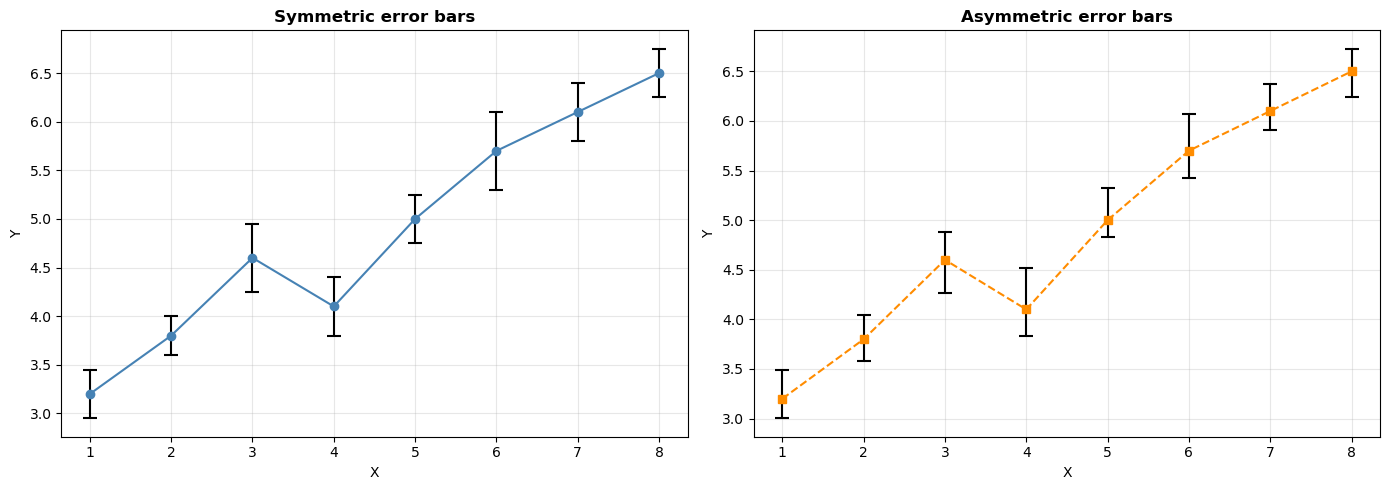

In [2]:
print('=== ERROR BAR EXAMPLES ===')
x = np.arange(1, 9)
y = np.array([3.2, 3.8, 4.6, 4.1, 5.0, 5.7, 6.1, 6.5])
err = np.array([0.25, 0.2, 0.35, 0.3, 0.25, 0.4, 0.3, 0.25])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Symmetric
axes[0].errorbar(x, y, yerr=err, fmt='o-', color='steelblue',
               ecolor='black', elinewidth=1.5, capsize=5, capthick=1.5)
axes[0].set_title('Symmetric error bars', fontweight='bold')
axes[0].set_xlabel('X'); axes[0].set_ylabel('Y')
axes[0].grid(True, alpha=0.3)

# Asymmetric
lower = err * np.random.uniform(0.6, 1.1, size=len(err))
upper = err * np.random.uniform(0.8, 1.4, size=len(err))
axes[1].errorbar(x, y, yerr=[lower, upper], fmt='s--', color='darkorange',
               ecolor='black', elinewidth=1.5, capsize=5, capthick=1.5)
axes[1].set_title('Asymmetric error bars', fontweight='bold')
axes[1].set_xlabel('X'); axes[1].set_ylabel('Y')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Error Bands with fill_between()

Shaded confidence bands are often easier to read than many individual error bars on dense x-axes.

```python
ax.plot(x, mean)
ax.fill_between(x, lower, upper, alpha=0.2)
```


=== ERROR BANDS (MEAN ± 1 STD) ===


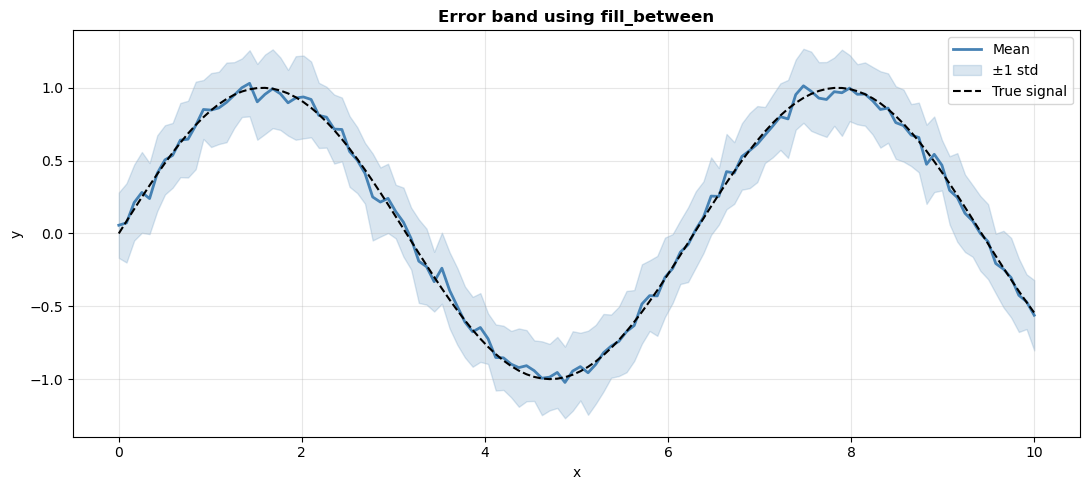

In [3]:
print('=== ERROR BANDS (MEAN ± 1 STD) ===')
x = np.linspace(0, 10, 120)
true = np.sin(x)

# Simulate repeated measurements at each x
n_rep = 40
Y = true[None, :] + np.random.normal(0, 0.25, size=(n_rep, len(x)))
mean = Y.mean(axis=0)
std = Y.std(axis=0)

lower = mean - std
upper = mean + std

fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(x, mean, color='steelblue', linewidth=2, label='Mean')
ax.fill_between(x, lower, upper, color='steelblue', alpha=0.2, label='±1 std')
ax.plot(x, true, color='black', linestyle='--', linewidth=1.5, label='True signal')
ax.set_title('Error band using fill_between', fontweight='bold')
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

## 3. Confidence Intervals for the Mean

A 95% confidence interval for the mean can be approximated as:
- CI = mean ± 1.96 × (std / sqrt(n)) for large n and approximately normal errors.

Below shows a curve-level CI using standard error across repeated samples.


=== 95% CI BAND (MEAN ± 1.96*SE) ===


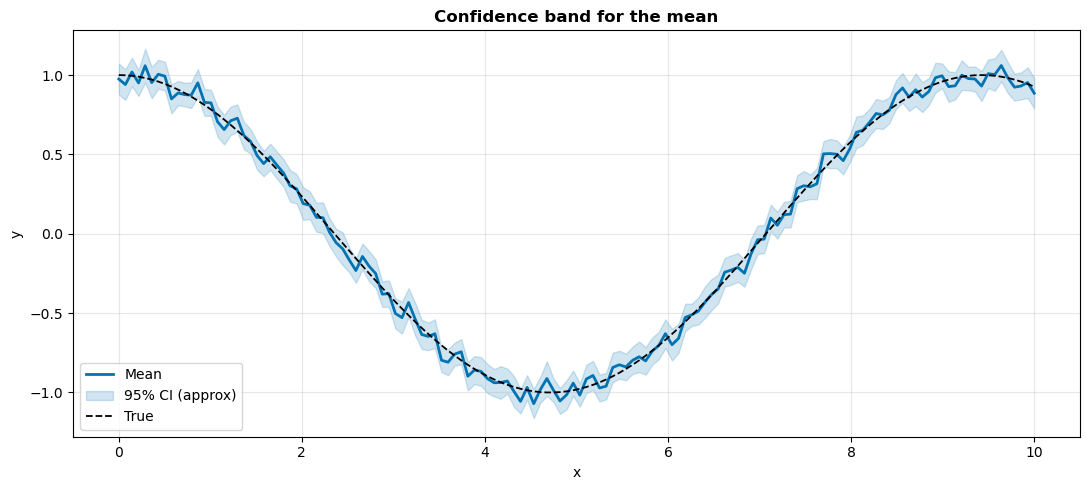

In [4]:
print('=== 95% CI BAND (MEAN ± 1.96*SE) ===')
x = np.linspace(0, 10, 140)
true = np.cos(x/1.5)
n_rep = 60
Y = true[None, :] + np.random.normal(0, 0.35, size=(n_rep, len(x)))
mean = Y.mean(axis=0)
std = Y.std(axis=0, ddof=1)
se = std / np.sqrt(n_rep)

lower = mean - 1.96 * se
upper = mean + 1.96 * se

fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(x, mean, color='#0173B2', linewidth=2, label='Mean')
ax.fill_between(x, lower, upper, color='#0173B2', alpha=0.18, label='95% CI (approx)')
ax.plot(x, true, color='black', linestyle='--', linewidth=1.3, label='True')
ax.set_title('Confidence band for the mean', fontweight='bold')
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

## 4. Bootstrap Confidence Band (Non-parametric)

When distributional assumptions are questionable, bootstrap resampling can estimate confidence intervals for the mean curve.

High-level steps:
1. Resample replicates with replacement.
2. Compute mean curve for each bootstrap sample.
3. Take percentile bounds (e.g., 2.5% and 97.5%).


=== BOOTSTRAP CI BAND (PERCENTILE) ===


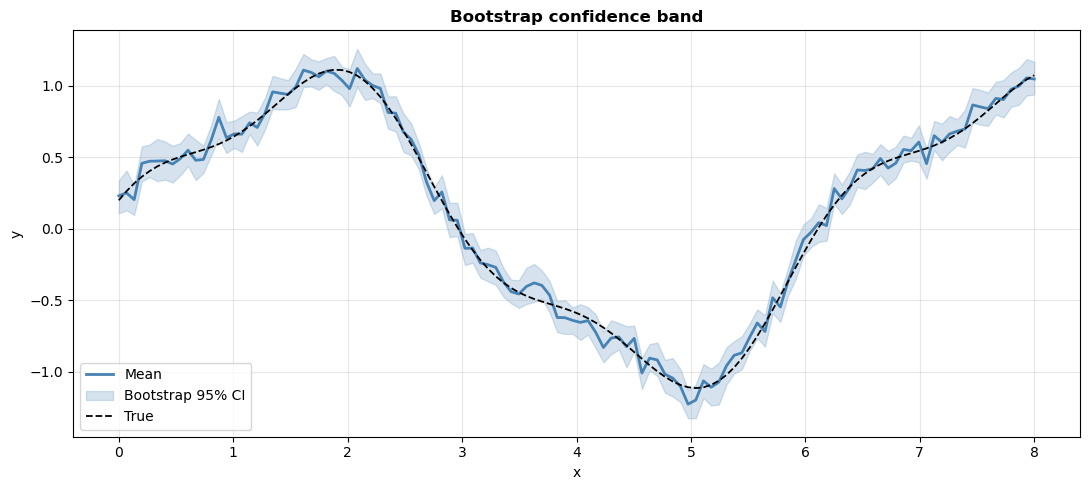

In [5]:
print('=== BOOTSTRAP CI BAND (PERCENTILE) ===')
x = np.linspace(0, 8, 120)
true = np.sin(x) + 0.2*np.cos(3*x)
n_rep = 35
Y = true[None, :] + np.random.normal(0, 0.35, size=(n_rep, len(x)))

B = 400  # bootstrap draws (increase for smoother CI)
boot_means = np.empty((B, len(x)))
for b in range(B):
    idx = np.random.randint(0, n_rep, size=n_rep)
    boot_means[b] = Y[idx].mean(axis=0)

mean = Y.mean(axis=0)
lower = np.percentile(boot_means, 2.5, axis=0)
upper = np.percentile(boot_means, 97.5, axis=0)

fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(x, mean, color='steelblue', linewidth=2, label='Mean')
ax.fill_between(x, lower, upper, color='steelblue', alpha=0.22, label='Bootstrap 95% CI')
ax.plot(x, true, color='black', linestyle='--', linewidth=1.3, label='True')
ax.set_title('Bootstrap confidence band', fontweight='bold')
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

## Best Practices
- State what uncertainty represents (std, SE, CI, prediction interval).
- Use bands for dense curves; error bars for sparse points.
- Use alpha around 0.15–0.30 so the mean curve remains readable.
- Avoid implying certainty: never hide uncertainty when decisions depend on it.

## Quick reference
```python
ax.errorbar(x, y, yerr=err, fmt='o-', capsize=4)
ax.fill_between(x, lower, upper, alpha=0.2)
```
